Correlation

In [19]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df=pd.read_csv(r"C:\Users\Admin\OneDrive\Desktop\DATA Folder\Python\movies.csv")

In [20]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [39]:
#Checking data
pd.set_option('display.max.columns',19)
pd.set_option('display.max_rows',None)


In [22]:
# We need to check if we have any missing data
# We loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [5]:
#Still checking the missing values 
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [6]:
#Data types in the columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [40]:
#Create correct year column
df[['date_month','year_country']]=df['released'].str.split(',',n=2,expand=True)
df['correct_year']=df['year_country'].astype(str).str[0:5]

df.head()


name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score      votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000.0  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0  Anthony Russo   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   

           gross                company  runtime   date_month  \
5445  2847246203  Twentieth Century Fox    162.0  December 18   
7445  2797501328         Marvel Studios    181.0     April 26   
3045  2201647264  Twentieth Century Fox    194.0  December 19   
6663  2069521700              Lucasfilm    138.0  December 18   
7244  2048359754         Marvel Studios    149.0     April 27   

               year_country correct_year  
5445   2009 (United States)         2009  
7445   2019 (United States)         2019  
3045   1997 (United States)         1997  
6663   2015 (United States)         2015  
7244   2018 (United States)         2018

In [24]:
#Changing data types of columns from float to integer

df['budget']=df['budget'].fillna(0).astype('int64')
df['gross']=df['gross'].fillna(0).astype('int64')

#Alternatively,we can use these codes incases where we do not have Na values 
#df['budget']=df['budget'].astype('Int64')
#df['gross']=df['gross'].astype('Int64')
#df['votes']=df['votes'].astype('Int64')


In [41]:
#Sorting dataset in descending order
df=df.sort_values(by=['gross'],inplace=False,ascending=False)
df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score      votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000.0  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0  Anthony Russo   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   

           gross                company  runtime   date_month  \
5445  2847246203  Twentieth Century Fox    162.0  December 18   
7445  2797501328         Marvel Studios    181.0     April 26   
3045  2201647264  Twentieth Century Fox    194.0  December 19   
6663  2069521700              Lucasfilm    138.0  December 18   
7244  2048359754         Marvel Studios    149.0     April 27   

               year_country correct_year  
5445   2009 (United States)         2009  
7445   2019 (United States)         2019  
3045   1997 (United States)         1997  
6663   2015 (United States)         2015  
7244   2018 (United States)         2018

In [46]:
#Droping any duplicates in specific column
df['company'].drop_duplicates().sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3368                              Zentropa Entertainments
535                                  Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329          

In [42]:
#Droping any duplicates
df.drop_duplicates().head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score      votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000.0  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0  Anthony Russo   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   

           gross                company  runtime   date_month  \
5445  2847246203  Twentieth Century Fox    162.0  December 18   
7445  2797501328         Marvel Studios    181.0     April 26   
3045  2201647264  Twentieth Century Fox    194.0  December 19   
6663  2069521700              Lucasfilm    138.0  December 18   
7244  2048359754         Marvel Studios    149.0     April 27   

               year_country correct_year  
5445   2009 (United States)         2009  
7445   2019 (United States)         2019  
3045   1997 (United States)         1997  
6663   2015 (United States)         2015  
7244   2018 (United States)         2018

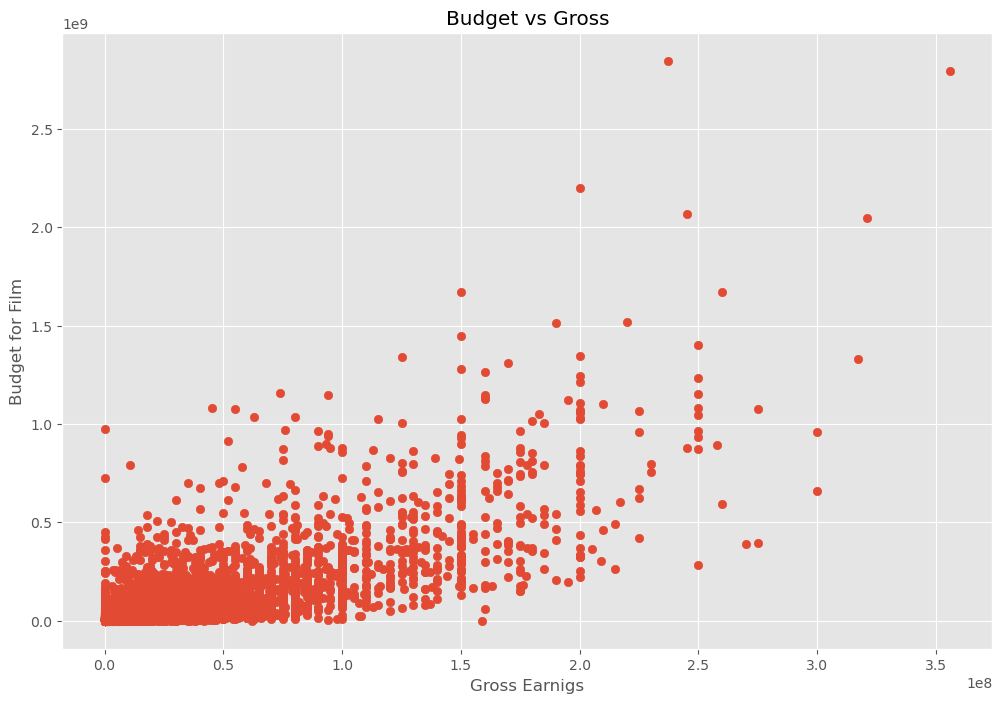

In [11]:
# A scatter plot of budget vs gross

plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs Gross')
plt.xlabel('Gross Earnigs')
plt.ylabel('Budget for Film')
plt.show()

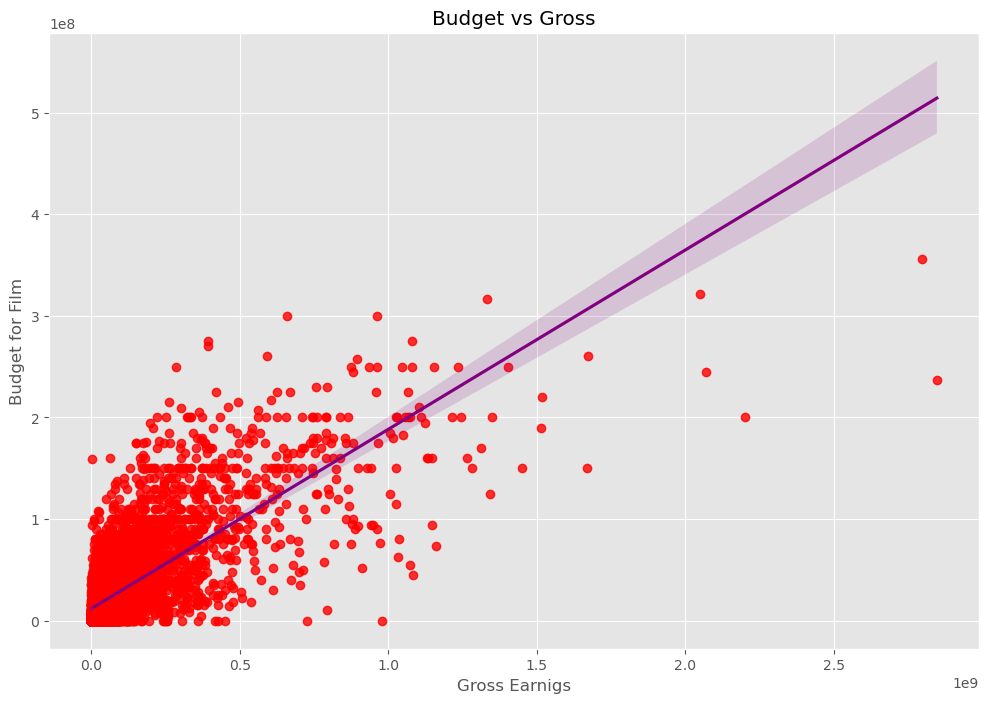

In [12]:
#Plot budget bvs gross using seaborn
sns.regplot(x="gross", y="budget", data=df,scatter_kws={"color":"red"},line_kws={"color":'purple'})

plt.title('Budget vs Gross')
plt.xlabel('Gross Earnigs')
plt.ylabel('Budget for Film')
plt.show()

In [ ]:
#Looking at the correlation
#Note that python by default uses Pearson correlation to determine relationship. However, we can specify the type of correaltion to show by specifying the method as either pearson,kendall or spearman

In [13]:
df.corr(numeric_only=True)
#This by default shows pearon correlation. Lets look at the other two

year     score     votes    budget     gross   runtime
year     1.000000  0.097995  0.222945  0.309212  0.261900  0.120811
score    0.097995  1.000000  0.409182  0.055665  0.186392  0.399451
votes    0.222945  0.409182  1.000000  0.486862  0.632834  0.309212
budget   0.309212  0.055665  0.486862  1.000000  0.750157  0.269510
gross    0.261900  0.186392  0.632834  0.750157  1.000000  0.245235
runtime  0.120811  0.399451  0.309212  0.269510  0.245235  1.000000

In [14]:
#kendall, spearman correlation
df.corr(method="kendall",numeric_only=True)

year     score     votes    budget     gross   runtime
year     1.000000  0.067652  0.331465  0.209304  0.216595  0.097184
score    0.067652  1.000000  0.300115 -0.005194  0.090626  0.283611
votes    0.331465  0.300115  1.000000  0.439902  0.560118  0.198240
budget   0.209304 -0.005194  0.439902  1.000000  0.541956  0.176016
gross    0.216595  0.090626  0.560118  0.541956  1.000000  0.176912
runtime  0.097184  0.283611  0.198240  0.176016  0.176912  1.000000

In [15]:
df.corr(method="spearman",numeric_only=True)

year     score     votes    budget     gross   runtime
year     1.000000  0.099045  0.469829  0.291152  0.314681  0.142977
score    0.099045  1.000000  0.428138 -0.007500  0.132569  0.399857
votes    0.469829  0.428138  1.000000  0.604627  0.752265  0.290159
budget   0.291152 -0.007500  0.604627  1.000000  0.716816  0.246748
gross    0.314681  0.132569  0.752265  0.716816  1.000000  0.256783
runtime  0.142977  0.399857  0.290159  0.246748  0.256783  1.000000

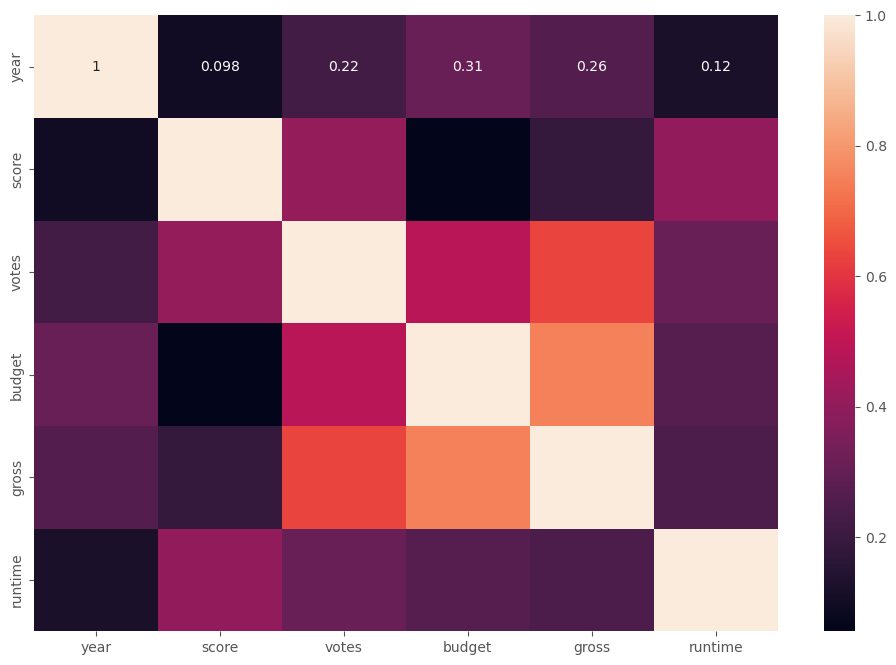

In [16]:
correlation_matrix=df.corr(numeric_only=True)
sns.heatmap(correlation_matrix,annot=True)

plt.show()

In [17]:
df_num=df
for col_names in df_num.columns:
    if (df_num[col_names].dtype=="object"):
        df_num[col_names]=df_num[col_names].astype("category")
        df_num[col_names]=df_num[col_names].cat.codes
df_num

name  rating  genre  year  released  score      votes  director  writer  \
5445   533       5      0  2009       696    7.8  1100000.0      1155    1778   
7445   535       5      0  2019       183    8.4   903000.0       162     743   
3045  6896       5      6  1997       704    7.8  1100000.0      1155    1778   
6663  5144       5      0  2015       698    7.8   876000.0      1125    2550   
7244   536       5      0  2018       192    8.4   897000.0       162     743   
7480  6194       4      2  2019      1488    6.9   222000.0      1455    1919   
6653  2969       5      0  2015      1704    7.0   593000.0       517    3568   
6043  5502       5      0  2012      2472    8.0  1300000.0      1517    2314   
6646  2145       5      0  2015       221    7.1   370000.0      1189     706   
7494  2131       4      2  2019      2676    6.8   148000.0       432    1950   
6644   534       5      0  2015      2235    7.3   777000.0      1517    2314   
7247   791       5      0  2018       959    7.3   661000.0      2457    3795   
5845  2407       5      1  2011      1445    8.1   790000.0       679    4052   
7075  5145       5      0  2017       661    7.0   581000.0      2282    3518   
7271  2970       5      0  2018      1799    6.2   277000.0      1121    1093   
6262  2130       4      2  2013      2715    7.4   585000.0       432    1950   
7072   657       4      7  2017      2022    7.1   283000.0       250    4000   
7281  2760       4      2  2018      1729    7.6   263000.0       303     491   
7055  5833       5      0  2017        61    6.6   214000.0       835    1431   
6244  2823       5      0  2013      2449    7.1   779000.0      2543    1174   
6688  3622       4      2  2015      1395    6.4   218000.0      1639     534   
6846  1056       5      0  2016      2488    7.8   694000.0       162     743   
7250   474       5      0  2018       748    6.9   404000.0      1189     990   
4245  6221       5      0  2003       680    8.9  1700000.0      2193    1745   
7458  5084       5      0  2019      1501    7.5   359000.0      1463     704   
7456  1061       5      0  2019      2213    6.8   478000.0       147     255   
5878  6968       5      0  2011      1870    6.2   390000.0      1886    1237   
6059  4951       5      0  2012      2804    7.7   642000.0      2476    3125   
6494  6967       5      0  2014      1849    5.6   302000.0      1886    1237   
2448  6194       1      2  1994      1811    8.5   970000.0      2415    1702   
6047  5726       5      0  2012      1510    8.4  1600000.0       483    2265   
7463  5141       5      0  2019       731    6.5   394000.0      1125     714   
7450  2930       6      5  2019      3062    8.4  1000000.0      2767    4248   
7488  6949       1      2  2019      1787    7.7   217000.0      1509    2158   
5685  6948       1      2  2010      1752    8.2   776000.0      1678    2158   
4852  4258       5      0  2006      1645    7.3   668000.0       996    4147   
6869  4616       5      0  2016       673    7.8   572000.0       912     717   
7481   290       4      1  2019      2394    6.9   239000.0      1031    2078   
5860  4261       5      0  2011      2350    6.6   492000.0      2341    4147   
7140  1552       4      2  2017      1896    6.3   119000.0      1639     758   
2245  2967       5      0  1993      1689    8.1   894000.0      2660    2931   
6908  1978       4      2  2016      1744    7.3   250000.0       124     215   
3451  5138       4      0  1999      2318    6.5   748000.0       963    1472   
5667   300       4      1  2010      2182    6.4   392000.0      2745    2607   
6863  7504       4      2  2016      2175    8.0   450000.0       362     576   
6045  6001       5      1  2012       651    7.8   773000.0      2193    1359   
3843  2412       4      1  2001      2593    7.6   685000.0       435    1741   
5243  5725       5      0  2008      1476    9.0  2400000.0       483    2265   
5652  2406       5      1  2010      

In [43]:
df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score      votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000.0  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0  Anthony Russo   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   

           gross                company  runtime   date_month  \
5445  2847246203  Twentieth Century Fox    162.0  December 18   
7445  2797501328         Marvel Studios    181.0     April 26   
3045  2201647264  Twentieth Century Fox    194.0  December 19   
6663  2069521700              Lucasfilm    138.0  December 18   
7244  2048359754         Marvel Studios    149.0     April 27   

               year_country correct_year  
5445   2009 (United States)         2009  
7445   2019 (United States)         2019  
3045   1997 (United States)         1997  
6663   2015 (United States)         2015  
7244   2018 (United States)         2018

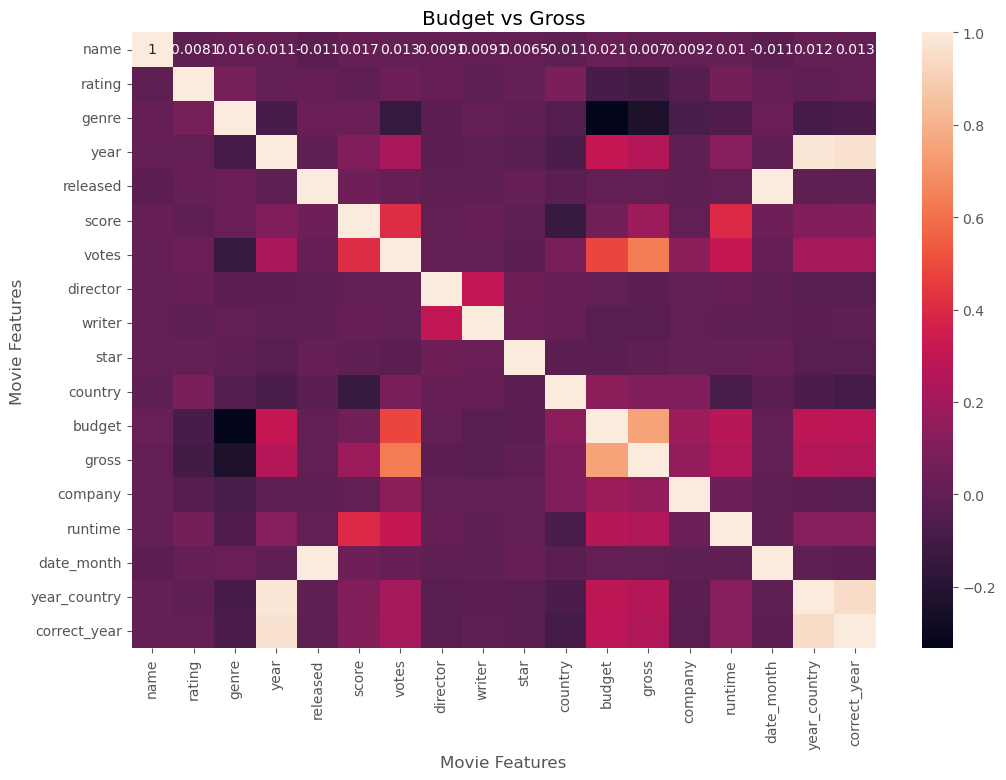

In [33]:
correlation_matrix=df_num.corr()
sns.heatmap(correlation_matrix,annot=True)



plt.title('Budget vs Gross')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [34]:
#Checking correlation in a more visible and understandable manner 

correlation_matix=df_num.corr()
corr_pair=correlation_matix.unstack()
corr_pair

name          name            1.000000
              rating         -0.008069
              genre           0.016355
              year            0.011453
              released       -0.011311
              score           0.017097
              votes           0.013088
              director        0.009079
              writer          0.009081
              star            0.006472
              country        -0.010737
              budget          0.020548
              gross           0.006989
              company         0.009211
              runtime         0.010392
              date_month     -0.011412
              year_country    0.012348
              correct_year    0.012855
rating        name           -0.008069
              rating          1.000000
              genre           0.072423
              year            0.008779
              released        0.016613
              score          -0.001314
              votes           0.033225
              director   

In [35]:
sorted_pairs=corr_pair.sort_values()
sorted_pairs

genre         budget         -0.334021
budget        genre          -0.334021
genre         gross          -0.234297
gross         genre          -0.234297
genre         votes          -0.145307
votes         genre          -0.145307
country       score          -0.133348
score         country        -0.133348
rating        gross          -0.095450
gross         rating         -0.095450
country       correct_year   -0.091035
correct_year  country        -0.091035
budget        rating         -0.081939
rating        budget         -0.081939
genre         year           -0.081261
year          genre          -0.081261
genre         year_country   -0.080101
year_country  genre          -0.080101
runtime       country        -0.078412
country       runtime        -0.078412
genre         company        -0.071067
company       genre          -0.071067
year          country        -0.070938
country       year           -0.070938
year_country  country        -0.067298
country       year_countr

In [37]:
high_corr=sorted_pairs[(sorted_pairs)>0.5]
high_corr

gross         votes           0.632834
votes         gross           0.632834
gross         budget          0.750157
budget        gross           0.750157
year_country  correct_year    0.944167
correct_year  year_country    0.944167
year          correct_year    0.967465
correct_year  year            0.967465
year_country  year            0.980716
year          year_country    0.980716
released      date_month      0.999759
date_month    released        0.999759
name          name            1.000000
date_month    date_month      1.000000
rating        rating          1.000000
genre         genre           1.000000
year          year            1.000000
released      released        1.000000
score         score           1.000000
votes         votes           1.000000
year_country  year_country    1.000000
director      director        1.000000
star          star            1.000000
country       country         1.000000
budget        budget          1.000000
gross         gross      

In [38]:
low_corr=sorted_pairs[(sorted_pairs)<0.5]
low_corr

genre         budget         -0.334021
budget        genre          -0.334021
genre         gross          -0.234297
gross         genre          -0.234297
genre         votes          -0.145307
votes         genre          -0.145307
country       score          -0.133348
score         country        -0.133348
rating        gross          -0.095450
gross         rating         -0.095450
country       correct_year   -0.091035
correct_year  country        -0.091035
budget        rating         -0.081939
rating        budget         -0.081939
genre         year           -0.081261
year          genre          -0.081261
genre         year_country   -0.080101
year_country  genre          -0.080101
runtime       country        -0.078412
country       runtime        -0.078412
genre         company        -0.071067
company       genre          -0.071067
year          country        -0.070938
country       year           -0.070938
year_country  country        -0.067298
country       year_countr